In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [21]:
#This will be the true mean for our arms and we will create the distributions for each arm using the mean coresponding to that arm.
#Variance remains 1, for reward distribution of the arm.
true_mean_for_ten_arms=np.random.randn(10)




# Please note block below will take time, as it will calculate for all 3 'c values'.

# UCB for c=2,1,4

In [22]:
C=[2,1,4]
avg_list_for_c=[]

for excercise in range(3):
    
    c= C[excercise]
    steps=1000

    Rt_for_every_player=np.zeros((2000,1000))

    for player in range(2000):


        Q= [0]*10
        N= [0]*10   
        
        #Let's take first 10 steps to pick every arm once to make Nt(a) non zero.
        for k in range(10):
            Rt= np.random.normal(true_mean_for_ten_arms[k],1)
            Q[k]= Rt
            N[k]+=1
            Rt_for_every_player[player][k]=Rt



        for t in range(10,1000):     

            vals=[]

            for k in range(10):

                term= Q[k] + (c*np.sqrt( np.log(t+1)/N[k]) )
                vals.append(term)


            At= np.argmax(vals)

            Rt=  np.random.normal(true_mean_for_ten_arms[At],1)


            Q[At]=(Rt+(Q[At]*N[At]))/(N[At]+1)
            N[At]+=1


            #Note the reward received at time 't' for every player.
            Rt_for_every_player[player][t]=Rt



    #We need average reward for every time step.
    average_reward_list=[]
    for t in range(steps):
        total_reward_at_t=0
        for player in range(2000):

            total_reward_at_t+=Rt_for_every_player[player][t]


        average_reward_at_t= total_reward_at_t/2000

        average_reward_list.append(average_reward_at_t)

    avg_list_for_c.append(average_reward_list)



# Greedy epsilon for e=0.1

In [23]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1


#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_2= np.zeros((2000,1000))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)

#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    for t in range(1000):

        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)



        #Now we got our reward at time step t.
        Rt=np.random.normal(true_mean_for_ten_arms[arm_to_pick],1)

        #Now we update the Q value for this arm which we picked
        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_2[player][t]=Rt


        
#We need average reward for every time step.
average_reward_list_2=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_2[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_2.append(average_reward_at_t)


# Figure 2.4 for c=2

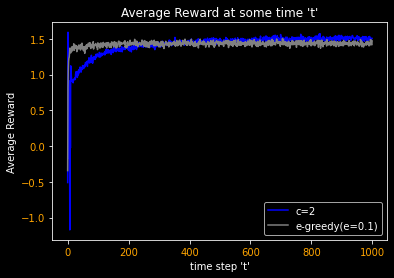

In [24]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.plot(range(1000), avg_list_for_c[0], color='blue', label='c=2')
plt.plot(range(1000), average_reward_list_2, color='gray', label='e-greedy(e=0.1)')
plt.legend()

# Fig 2.4 for c=1

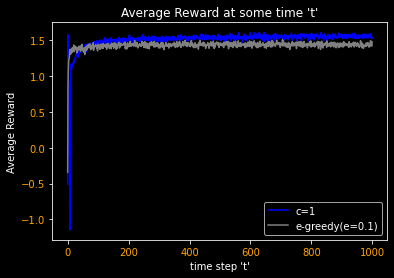

In [25]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.plot(range(1000),avg_list_for_c[1] , color='blue', label='c=1')
plt.plot(range(1000), average_reward_list_2, color='gray', label='e-greedy(e=0.1)')
plt.legend()

# Fig 2.4 for c=4

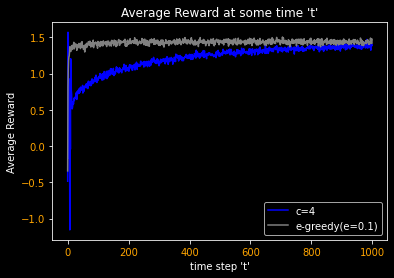

In [26]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.plot(range(1000),avg_list_for_c[2] , color='blue', label='c=4')
plt.plot(range(1000), average_reward_list_2, color='gray', label='e-greedy(e=0.1)')
plt.legend()